In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Central Limit Theorem

mean: 16.6581555154  ; SD: 39.4801998516


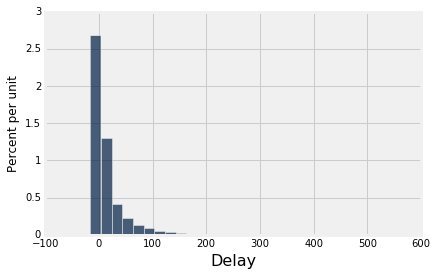

In [2]:
united = Table.read_table('http://inferentialthinking.com/notebooks/united_summer2015.csv')
delay = united.select('Delay')
delay.hist(bins=30)

mean_delay = np.mean(delay.column(0))
sd_delay = np.std(delay.column(0))
print('mean:', mean_delay,' ; SD:', sd_delay)

In [3]:
def sample_means(sample_size):
    means = []
    for i in np.arange(10000):
        sample = delay.sample(sample_size)
        means.append(np.mean(sample.column(0)))
    return means

def variability(sample_size):
    means = sample_means(sample_size)
    Table().with_column('Sample mean', means).hist(bins=30, unit='minute')
    sqrt_n = np.sqrt(sample_size)
    print('Sample size:          ', sample_size)
    print('Square root n:        ', sqrt_n)
    print('Sample mean SD:       ', np.std(means)) # 7 spaces
    print(sd_delay, '/', sqrt_n, '=', sd_delay / sqrt_n)

Sample size:           900
Square root n:         30.0
Sample mean SD:        1.32676650819
39.4801998516 / 30.0 = 1.31600666172


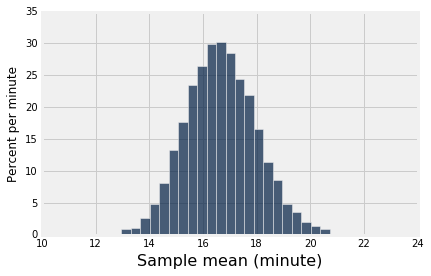

In [4]:
variability(900)

Sample size:           4
Square root n:         2.0
Sample mean SD:        20.2055944387
39.4801998516 / 2.0 = 19.7400999258


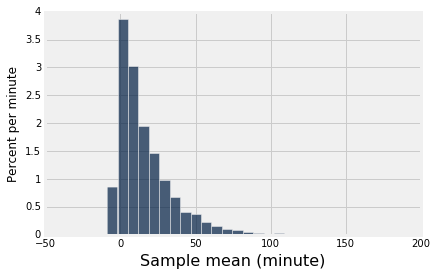

In [5]:
variability(4)

Sample size:           20
Square root n:         4.472135955
Sample mean SD:        8.80254836963
39.4801998516 / 4.472135955 = 8.82804106335


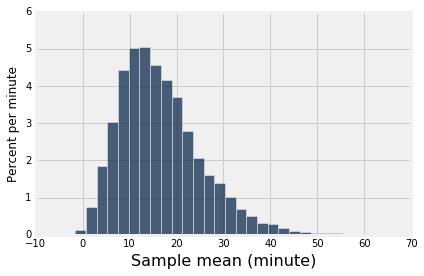

In [7]:
variability(20)

Sample size:           50
Square root n:         7.07106781187
Sample mean SD:        5.63971080248
39.4801998516 / 7.07106781187 = 5.58334340753


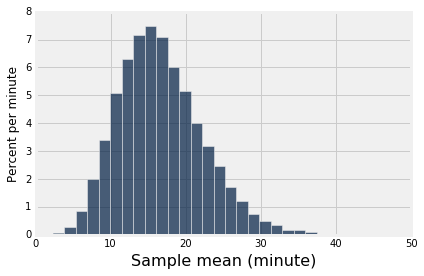

In [8]:
variability(50)

## Discussion

In [9]:
0.975 ** 100

0.07951728986183142

## Experiment Design

In [10]:
votes = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
np.std(votes)

0.5

In [11]:
votes = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
np.std(votes)

0.45825756949558394

In [12]:
votes = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
np.std(votes)

0.40000000000000008

In [13]:
votes = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
np.std(votes)

0.30000000000000004

In [14]:
votes = [1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
np.std(votes)

0.45825756949558405

In [15]:
votes = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
np.std(votes)

0.40000000000000002

In [16]:
votes = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
np.std(votes)

0.29999999999999999

In [17]:
worst_sd_of_population = 0.5
width_in_sds = 4 # For 95% of a normal distribution, mean +/- 2 SDs
desired_width = 0.03 
sample_size = (worst_sd_of_population * width_in_sds / desired_width) ** 2
sample_size

4444.444444444445

In [18]:
n = 4445

### Conducting the experiment

In [19]:
# Hide before lecture
voters = Table().with_column(
    'Candidate', ['A', 'B'],
    'Chance',    [0.5, 0.5]) # Might be different in live lecture!

In [20]:
voters.labels

('Candidate', 'Chance')

In [21]:
voters.select(0)

Candidate
A
B


In [22]:
sum(voters.column(1))

1.0

In [23]:
observed_sample = voters.select(0).sample(n, weights=coin.column('Chance'))
observed_sample

NameError: name 'coin' is not defined

In [ ]:
means = []
for i in np.arange(1000):
    resample = observed_sample.sample()
    means.append(np.count_nonzero(resample.column(0) == 'A') / n)
print(percentile(2.5, means), percentile(97.5, means))